## PHYS 105A:  Introduction to Scientific Computing

# Numerical Integration of Functions

Chi-kwan Chan

## Importance of Integration in Physics

* Physical (dynamic) systems are very often described by ordinary differential equations, examples include Newton's second law:
   $f = m a = m \frac{dx^2}{dt^2}$.
   
* For fields, their are described by partial differential equations.

* In order to predict how physical systems behave, we need to integrate these diffrential equations.

## Nmerical Integration of Functions

* But before we learn how to solve generic ODEs, let's learn a simple special case:
  $I = \int_a^b f(x) dx$.

* Note that this integration is equivalent to solving for the value $I \equiv y(b)$ of the differential equation $dy/dx = f(x)$ with the boundary condition $y(a) = 0$.

* By doing so, we will learn the important concept of convergence.

## Analytical Example

* Numerical integration can help us solve problems without analytical solutions.

* But to help our understanding, we will first use an example with analytical solution.

* Let's consider $f(x) = e^{x}$.

* The indefinite integration is $\int f(x) dx = e^{x} + C$, where $C$ is a constant.

* The definite integral is $\int_a^b f(x) dx = e^{b} - e^{a}$.

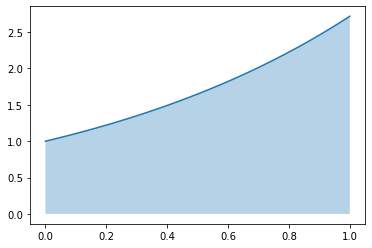

In [1]:
# It is useful to plot the function for visualization.

import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return np.exp(x)

x = np.linspace(0, 1, 101) # define a fine grid for plotting
y = f(x)                   # sample function f on the grid

plt.plot(x, y)
plt.fill_between(x, y, alpha=0.33)

## Riemann Sums

* When we first learn about ingegration, we usually learn about the Riemann sum first.

    $I \approx S \equiv \sum_{i = 1}^n f(x_i^*) \Delta x_i$
  
  where $\Delta x_i = x_i - x_{i-1}$.
  
* If $x_i^* = x_{i-1}$ for all $i$, then $S$ is called the left Reimann Sum.

* If $x_i^* = x_i$ for all $i$, then $S$ is called the right Reimann Sum.

* If $x_i^* = (x_{i-1} + x_i)/2$ for all $i$, then $S$ is called the middle Reimann Sum.

* There are other Riemann Sums such as the supper and lower Riemann (Darboux) sums.  But we won't discuss them here.  They are useful for prove mathemtical theories but less useful in numerical analysis.

* In the limit $\Delta x_i \rightarrow 0$, the Riemann Sums converge to the integral.

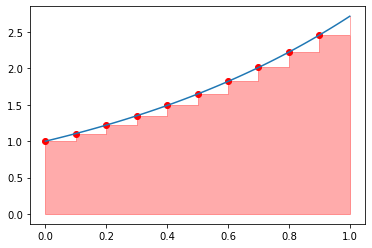

In [2]:
# Graphically, this is the left Reimann Sum

X = np.linspace(0, 1, 11) # define a coarse grid for the sum
Y = f(X)                  # sample function f on the grid

plt.plot(x, y)
plt.scatter(X[:-1], Y[:-1], color='r')
plt.fill_between(X, Y, step='post', color='r', alpha=0.33)

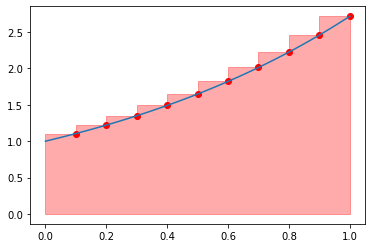

In [3]:
# And this is the right Reimann Sum

plt.plot(x, y)
plt.scatter(X[1:], Y[1:], color='r')
plt.fill_between(X, Y, step='pre', color='r', alpha=0.33)

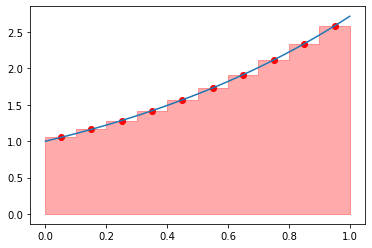

In [4]:
# And this is the middle Reimann Sum

X = np.linspace(0, 1, 11)
X = 0.5 * (X[:-1] + X[1:])
Y = f(X)

plt.plot(x, y)
plt.scatter(X, Y, color='r')
plt.fill_between(np.concatenate([[0], X, [1]]), 
                 np.concatenate([Y[:1], Y, Y[-1:]]), 
                 step='mid', color='r', alpha=0.33)

In [5]:
# We can easily compute the Riemann sums numerically!
#
# Here's the left Riemann sum.

N = 10
D = 1 / N
X = [D * i for i in range(N)]
S = np.sum(f(X) * D)

print('Left Riemann Sum:', S)

# And we can compare it with the true answer

I = f(1) - f(0)
print('Analytical solution:', I)

# The difference is
print('Error:', abs(I - S))

Left Riemann Sum: 1.6337993999663625
Analytical solution: 1.718281828459045
Error: 0.08448242849268262


In [6]:
# Here's the right Riemann sum.

N = 10
D = 1 / N
X = [D * (i+1) for i in range(N)] # note the (i+1) here
S = np.sum(f(X) * D)

print('Right Riemann Sum:', S)

# And we can compare it with the true answer

I = f(1) - f(0)
print('Analytical solution:', I)

# The difference is
print('Error:', abs(I - S))

Right Riemann Sum: 1.8056275828122668
Analytical solution: 1.718281828459045
Error: 0.08734575435322167


In [7]:
# Here's the middle Riemann sum.

N = 10
D = 1 / N
X = [D * (i+0.5) for i in range(N)] # note the (i+0.5) here
S = np.sum(f(X) * D)

print('Right Riemann Sum:', S)

# And we can compare it with the true answer

I = f(1) - f(0)
print('Analytical solution:', I)

# The difference is
print('Error:', abs(I - S))

Right Riemann Sum: 1.717566086461128
Analytical solution: 1.718281828459045
Error: 0.0007157419979171298


* For this particular case, the middle Riemann sum gives us much accurate solution!

* This may be clear from the figures already.

* However, if we refine the step size, clearly the errors in the left and right Riemann sums will reduce as well.

* How does the error depend on the step size?

In [8]:
# Let's define a function with different parameters
# to compute the different types of Riemann Sum.

def RiemannSum(f, N=10, a=0, b=1, t='mid'):
    D = (b-a) / N
    if t[0] == 'l':
        X = [D*(i    ) + a for i in range(N)]
    elif t[0] == 'r':
        X = [D*(i+1  ) + a for i in range(N)]
    else:
        X = [D*(i+0.5) + a for i in range(N)]
    return np.sum(f(np.array(X)) * D)

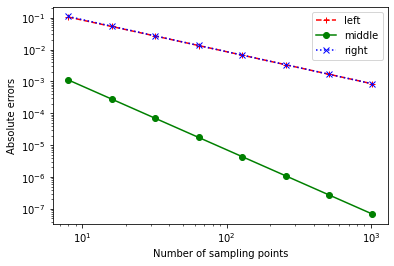

In [9]:
# Let's now define a different numbers of grid points.

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

# And compute the Riemann sums using the different methods
err_l = [abs(RiemannSum(f, N, t='l') - I) for N in Ns]
err_m = [abs(RiemannSum(f, N, t='m') - I) for N in Ns]
err_r = [abs(RiemannSum(f, N, t='r') - I) for N in Ns]

# It is cool that the error in the middle Riemann sum, even with
# only 8 points, is compariable to the left and right Riemann sums
# using ~ 100 points!
# It is even more impressive that when we use ~ 1000 points in the
# middle Riemann sum, the error is just ~ 1e-7!
plt.loglog(Ns, err_l, '+--', color='r', label='left')
plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_r, 'x:',  color='b', label='right')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

* It is cool that the error in the middle Riemann sum, even with only 8 points, is compariable to the left and right Riemann sums using ~ 100 points!

* It is even more impressive that when we use ~ 1000 points in the middle Riemann sum, the error is just ~ 1e-7!

* Is this generically true?

* We may create the same convergence plots for different functions.

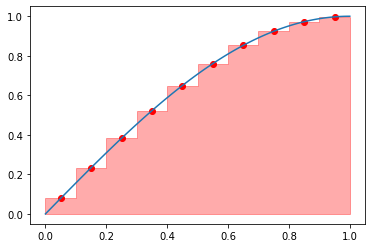

In [10]:
# Test with different functions, this is half cycle of sin()

def g(x):
    return np.sin(x * np.pi/2)

X = np.linspace(0, 1, 11)
X = 0.5 * (X[:-1] + X[1:])
Y = g(X)

plt.plot(x, g(x))
plt.scatter(X, Y, color='r')
plt.fill_between(np.concatenate([[0], X, [1]]), 
                 np.concatenate([Y[:1], Y, Y[-1:]]), 
                 step='mid', color='r', alpha=0.33)

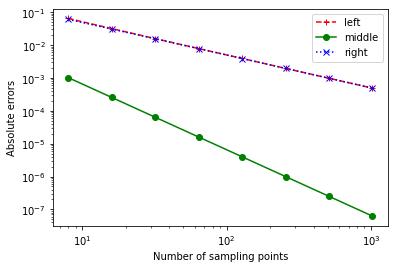

In [11]:
# And compute the Riemann sums using the different methods
err_l = [abs(RiemannSum(g, N, t='l') - 2 / np.pi) for N in Ns]
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_r = [abs(RiemannSum(g, N, t='r') - 2 / np.pi) for N in Ns]

# It is cool that the error in the middle Riemann sum, even with
# only 8 points, is compariable to the left and right Riemann sums
# using ~ 100 points!
# It is even more impressive that when we use ~ 1000 points in the
# middle Riemann sum, the error is just ~ 1e-7!
plt.loglog(Ns, err_l, '+--', color='r', label='left')
plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_r, 'x:',  color='b', label='right')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

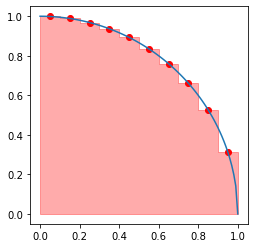

In [12]:
# Test with different functions, this is a quarter circle

def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 11)
X = 0.5 * (X[:-1] + X[1:])
Y = h(X)

plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(np.concatenate([[0], X, [1]]), 
                 np.concatenate([Y[:1], Y, Y[-1:]]), 
                 step='mid', color='r', alpha=0.33)
plt.gca().set_aspect('equal')

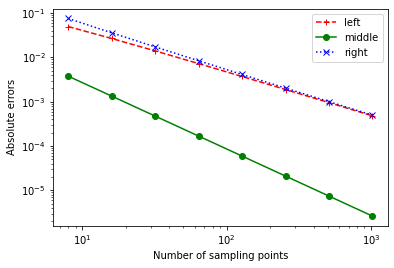

In [13]:
# And compute the Riemann sums using the different methods
err_l = [abs(RiemannSum(h, N, t='l') - np.pi/4) for N in Ns]
err_m = [abs(RiemannSum(h, N, t='m') - np.pi/4) for N in Ns]
err_r = [abs(RiemannSum(h, N, t='r') - np.pi/4) for N in Ns]

# It is cool that the error in the middle Riemann sum, even with
# only 8 points, is compariable to the left and right Riemann sums
# using ~ 100 points!
# It is even more impressive that when we use ~ 1000 points in the
# middle Riemann sum, the error is just ~ 1e-7!
plt.loglog(Ns, err_l, '+--', color='r', label='left')
plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_r, 'x:',  color='b', label='right')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

* Although the detail errors are different for different curves, the general trends are the same.

  * When we increase the number of sampling points by 2, or decrease the size of the step by 2, left and right Riemann sums cuts the error by 1/2.
  
  * When we increase the number of sampling points by 2, or decrease the size of the step by 2, middle Riemann sums cuts the error by 1/4!
  
* In general, we say the middle Riemann sum converge faster than the left and right Riemann sums.

* However, using the different Riemann sum to discuss numerical integration, while it is formally correct, it is difficult to generalize.  This is espeically true for the middle Riemann sum that requires a different set of sampling points.

* Starting in the next slide, we will use the notation used in the numerical recipes.

## Trapezoidal Rule:

* We will now stick with the "vertex" formulation, i.e. $x_i = a + i \Delta x$.

* Instead of considering the middle Reiman sum, we will use the following apprxoimation.

  $\int_{x_0}^{x_1} f(x) dx =
  h \left[\frac{1}{2} f_0 + \frac{1}{2} f_1\right] + \mathcal{O}(h^3 f'')$
  
* This is called the trapezoidal rule.

* The error term $\mathcal{O}(\ )$ reprsents that the true answer differs from the estimate by an amount that is proportional to $h^3$ and $f''$.

* If $f$ is linear, i.e., $f'' = 0$, then the trapezoidal is be extract.

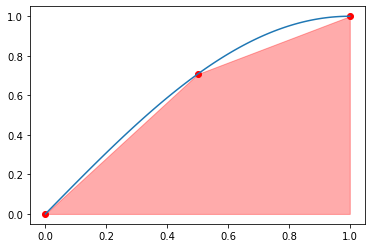

In [14]:
# Test with different functions, this is a quarter circle

X = np.linspace(0, 1, 3)
Y = g(X)

plt.plot(x, g(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, g(X), color='r', alpha=0.33)

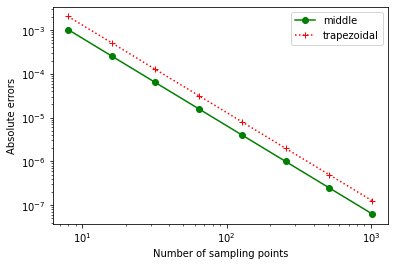

In [15]:
# We can how program the trapezoidal rule and test it

def trapezoidal(f, N=10, a=0, b=1, t='mid'):
    X, D = np.linspace(a, b, N+1, retstep=True)
    return np.sum((0.5*f(X[1:])+0.5*f(X[:-1])) * D)

# And compute the Riemann sums using the different methods
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_t = [abs(trapezoidal(g, N)       - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_t, '+:',  color='r', label='trapezoidal')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

## Simpson’s Rule

* Given that the trapezoidal rule is extact for lienar functions, i.e., first order polynomials, one natural question is if we can construct a rule that is exact for second order polynomials.

* It turns out that we can.  The result is called the Simpson's rule:

  $\int_{x_0}^{x_2} f(x) dx =
  h \left[\frac{1}{3} f_0 + \frac{4}{3} f_1 + \frac{1}{3} f_2\right] + \mathcal{O}(h^5 f^{(4)})$
  
* Note that this formulate integrate up to $x_2$.

* If we want to integrate to $x_1$ instead, this formulate increase the number of function evaluation.
  
* The error term $\mathcal{O}(\ )$ suggests a much rapider convegent rate.

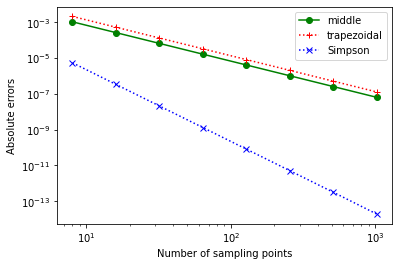

In [16]:
# We can how program the Simpson rule and test it

def Simpson(f, N=10, a=0, b=1, t='mid'):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//2):
        l = X[2*i]
        m = X[2*i+1]
        r = X[2*i+2]
        S += D * (f(l) + 4*f(m) + f(r)) / 3
    return S

# And compute the Riemann sums using the different methods
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_t = [abs(trapezoidal(g, N)       - 2 / np.pi) for N in Ns]
err_S = [abs(Simpson(g, N)           - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_t, '+:',  color='r', label='trapezoidal')
plt.loglog(Ns, err_S, 'x:',  color='b', label='Simpson')

plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

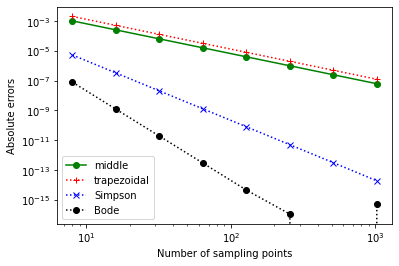

In [17]:
# We can even generalize it to the Bode's rule

def Bode(f, N=8, a=0, b=1, t='mid'):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//4):
        x0 = X[4*i]
        x1 = X[4*i+1]
        x2 = X[4*i+2]
        x3 = X[4*i+3]
        x4 = X[4*i+4]
        S += D * (14*f(x0) + 64*f(x1) + 24*f(x2) + 64*f(x3) + 14*f(x4)) / 45
    return S

# And compute the Riemann sums using the different methods
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_t = [abs(trapezoidal(g, N)       - 2 / np.pi) for N in Ns]
err_S = [abs(Simpson(g, N)           - 2 / np.pi) for N in Ns]
err_B = [abs(Bode(g, N)              - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o-',  color='g', label='middle')
plt.loglog(Ns, err_t, '+:',  color='r', label='trapezoidal')
plt.loglog(Ns, err_S, 'x:',  color='b', label='Simpson')
plt.loglog(Ns, err_B, 'o:',  color='k', label='Bode')

plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

## Final comments

* Based on the previous examples, by increasing the order of the approximations, it is possible to construct numerical integration that converges very rapidly.

* For double precision floating point values, the machine accruacy is $\sim 10^{-16}$.  We saw with Bode's rule, we are already reaching that limit for $\sim 256$ sampling points.

* In practice, for smooth functions, it is even possible to develop numerical integrators that converge exponentially!

* However, if the function is not smooth, i.e., with discontinuity, then formally the convergent rate is only first order.  Hence, refining the sampling points near the discontinuity is the only method to provide accurate integration.

* Also, the approximations we introduce in this lecture includes the *end points* of the function.  It will be difficult to apply these numerical methods to, e.g., improper integral, or functions with singularity.

* For the assignment that we will do in two weeks, we will learn how to modify our integrators to exclude the end points, and use them for improper integral and functions with singularity.